## 04 - Resultados da Pesquisa  

Pergunta de pesquisa: O lucro bruto dos postos de combustíveis está relacionado com a desigualdade social no estados?  
 - Hipótese: Quanto maior o lucro bruto dos postos de combustível, maior o índice de Gini para aquele estado.  
 - Modelo: Criar um scatterplot do lucro bruto pelo índice de Gini para o estados.
    

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib
from jupyterthemes import jtplot
jtplot.style(theme='monokai')

Carregando os DataSets  
→ Os dados o índice de Gini foram obitidos a partir do site do [IPEA](http://www.ipeadata.gov.br/Default.aspx)

In [4]:
lucro_bruto = pd.read_csv('../data/LucroBruto.csv', sep=';', usecols=['DATA INICIAL', 'ESTADO', 'DELTA', 'REGIAO'])
indice_gini = pd.read_csv('../data/ipeadata_gini.csv', sep=';', header=1, decimal=',')

Formatando inicialmente o dataset do lucro_bruto

In [5]:
lucro_bruto.sample(5)

,DATA INICIAL,REGIAO,ESTADO,DELTA
33162,2010-10-31,NORTE,AC,0.415
73591,2019-09-01,NORTE,TO,0.560
18930,2009-04-05,NORDESTE,PE,0.332
64103,2017-12-17,NORDESTE,RN,0.435
60943,2017-05-28,NORTE,RO,0.517


In [6]:
lucro_bruto.rename({'DELTA':'Lucro Bruto'}, axis=1, inplace=True)

In [7]:
lucro_bruto.isnull().values.any()

True

In [8]:
lucro_bruto.isnull().sum().sum()

531

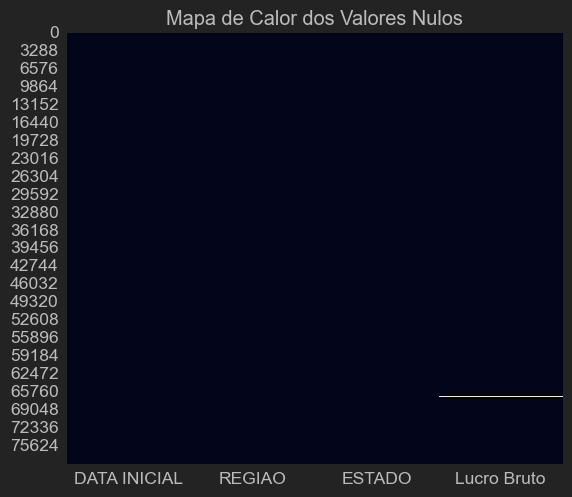

In [9]:
sns.heatmap(lucro_bruto.isnull(), cbar=False)
plt.title('Mapa de Calor dos Valores Nulos')
plt.show()

Como há somente 531 valores nulos e eles pertencem todos a coluna DELTA, vou dropar esses valores

In [10]:
lucro_bruto.dropna(inplace=True)
lucro_bruto.isnull().sum().sum()

0

In [11]:
lucro_bruto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78362 entries, 0 to 78892
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DATA INICIAL  78362 non-null  object 
 1   REGIAO        78362 non-null  object 
 2   ESTADO        78362 non-null  object 
 3   Lucro Bruto   78362 non-null  float64
dtypes: float64(1), object(3)
memory usage: 3.0+ MB


In [12]:
lucro_bruto['DATA INICIAL'] = lucro_bruto['DATA INICIAL'].astype('datetime64[ns]')
lucro_bruto.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78362 entries, 0 to 78892
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATA INICIAL  78362 non-null  datetime64[ns]
 1   REGIAO        78362 non-null  object        
 2   ESTADO        78362 non-null  object        
 3   Lucro Bruto   78362 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(2)
memory usage: 3.0+ MB


Agora, formatando o dataset do índice de Gini

In [13]:
indice_gini.sample(5)

,Sigla,Código,Estado,2014,Unnamed: 4
5,CE,23,Ceará,0.505775,NaN
9,MA,21,Maranhão,0.529296,NaN
13,PA,15,Pará,0.485949,NaN
14,PB,25,Paraíba,0.513249,NaN
22,RS,43,Rio Grande do Sul,0.475859,NaN


In [14]:
indice_gini.drop(['Código', 'Estado', 'Unnamed: 4'], axis=1, inplace=True, errors='ignore')
indice_gini.sample(5)

,Sigla,2014
19,RN,0.496227
6,DF,0.582424
4,BA,0.527366
10,MG,0.484796
18,RJ,0.524874


In [15]:
indice_gini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sigla   27 non-null     object 
 1   2014    27 non-null     float64
dtypes: float64(1), object(1)
memory usage: 560.0+ bytes


Com a linha acima conseguimos perceber que não há valores nulos no dataframe (27 não nulos em cada coluna)

In [16]:
indice_gini.rename({'2014':'Indice de Gini (2014)', 'Sigla':'ESTADO'}, axis=1, inplace=True)
indice_gini['Indice de Gini (2014)'] = indice_gini['Indice de Gini (2014)'].astype(float)
indice_gini.sample(5)

,ESTADO,Indice de Gini (2014)
1,AL,0.501098
21,RR,0.502378
17,PR,0.453000
14,PB,0.513249
15,PE,0.506982


Agora que temos os dois dataframes formatados, precisamos adequar as datas do dataframe de lucro bruto (para 2014)

In [17]:
lucro_bruto = lucro_bruto.groupby([lucro_bruto['DATA INICIAL'].dt.year, lucro_bruto['ESTADO'], lucro_bruto['REGIAO']]).mean().reset_index() #agrupando por estado e por ano (utilizando a média daquele ano)


In [18]:
lucro_bruto = lucro_bruto[lucro_bruto['DATA INICIAL']==2014].reset_index().drop(columns=['index'])
lucro_bruto

,DATA INICIAL,ESTADO,REGIAO,Lucro Bruto
0,2014,AC,NORTE,0.480530
1,2014,AL,NORDESTE,0.318909
2,2014,AM,NORTE,0.308231
3,2014,AP,NORTE,0.305258
4,2014,BA,NORDESTE,0.366683
5,2014,CE,NORDESTE,0.313337
6,2014,DF,CENTRO OESTE,0.295032
7,2014,ES,SUDESTE,0.324942
8,2014,GO,CENTRO OESTE,0.304424
9,2014,MA,NORDESTE,0.295260


Os dois dataseta tem 27 linhas não nulas, podemos unir os pela sigla

In [19]:
relacao_final = pd.merge(lucro_bruto, indice_gini, how='left', on=['ESTADO'])


d:\Programas\Conda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'Lucro Bruto x Indice de Gini'}, xlabel='Indice de Gini (2014)', ylabel='Lucro Bruto'>

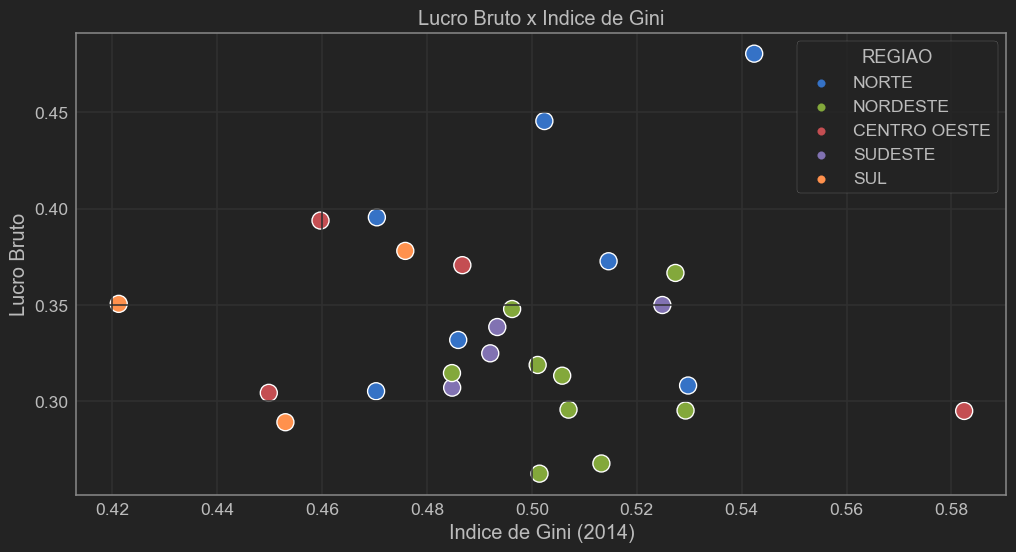

In [20]:
plt.figure(figsize=(12, 6))
plt.title('Lucro Bruto x Indice de Gini')

sns.scatterplot(relacao_final['Indice de Gini (2014)'], relacao_final['Lucro Bruto'], hue=relacao_final['REGIAO'], s=150)

Baseado no Scatterplot acima, podemos perceber que há uma pequena relação linear entre os valores, mas não há uma significância muito grande.  
  
É um pouco aparente que, quanto maior o índice de Gini, maior o lucro bruto dos postos, no entanto, essa relação não é tão clara.
  
Além disso, o nordeste aparenta ter uma pequena concentração no gráfico, enquanto as outras regiões aparentam estar mais dispersas.